In [ ]:
Chapter 1
Section 1.1
Chapter 2
Section 2.1
Section 2.2

In [3]:
import pandas as pd
url = "https://coinmarketcap.com/it/currencies/bitcoin/markets/"
lists= pd.read_html(url)

ValueError: No tables found

In [3]:
import sys
sys.executable

'C:\\Program Files (x86)\\Microsoft Visual Studio\\Shared\\Python37_64\\python.exe'

Chapter 1
Section 1.1
Chapter 2
Section 2.1
Section 2.2

1. Chapter 1
    1.1 Section 1.1
2. Chapter 2
    2.1 Section 2.1
    2.2 Section 2.2

In [6]:
%%javascript
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [23]:
%time
import os
print(os.path.join(os.getcwd()))

Wall time: 0 ns
c:\Users\Marco\Desktop\Marco\Python\20210819_finance


In [12]:
import jp_proxy_widget

nb_name = None

def save_name(name):
    global nb_name
    nb_name = name

get_name = jp_proxy_widget.JSProxyWidget()
get_name.js_init("""
var name = IPython.notebook.notebook_name;
element.html("The name of the notebook is" + name);
save_name(name);
""", save_name=save_name)
get_name

ModuleNotFoundError: No module named 'jp_proxy_widget'

In [ ]:
!echo %cd% # under windows
!echo %PATH%

In [35]:
from datetime import date
date.today()

datetime.date(2021, 8, 27)

In [96]:
import pandas as pd
import yfinance as yf

tickers = ['EURUSD%3DX','BTC-EUR']
START="2021-07-30"
END="2021-08-27"
df = yf.download(tickers,start=START,end=END)

[*********************100%***********************]  2 of 2 completed


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

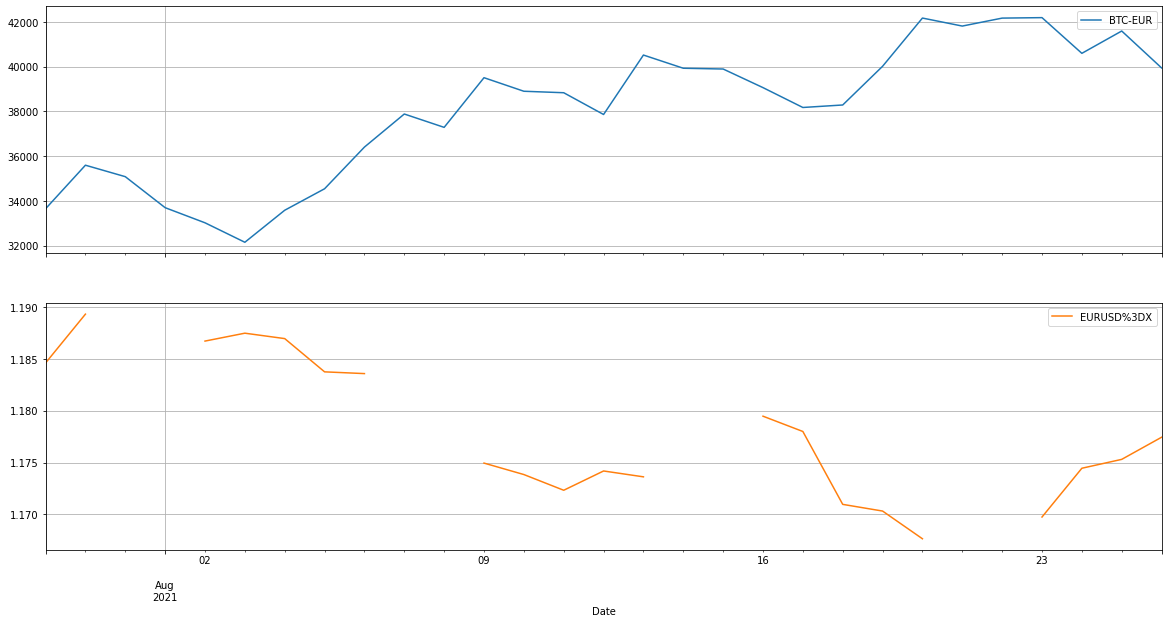

In [97]:
df["Close"].plot(grid = True,figsize=(20,10),subplots = True)

In [7]:
import pandas
import requests
from bs4 import BeautifulSoup

link = 'https://coinmarketcap.com/currencies/bitcoin/historical-data/?start={}&end={}'

def get_coinmarketcap_info(url,s_date,e_date):
    response = requests.get(url.format(s_date,e_date))
    soup = BeautifulSoup(response.text,"lxml")

    for items in soup.select("table.table tr.text-right"):
        date = items.select_one("td.text-left").get_text(strip=True)
        close = items.select_one("td[data-format-market-cap]").find_previous_sibling().get_text(strip=True)
        volume = items.select_one("td[data-format-market-cap]").get_text(strip=True)
        marketcap = items.select_one("td[data-format-market-cap]").find_next_sibling().get_text(strip=True)
        yield date,close,volume,marketcap


<generator object get_coinmarketcap_info at 0x0000014802B77048>

In [10]:
dataframe = (elem for elem in get_coinmarketcap_info(link,s_date='20130428',e_date='20191020'))
df = pandas.DataFrame(dataframe)
print(df)

Empty DataFrame
Columns: []
Index: []


In [17]:
import pandas
import requests
import BeautifulSoup

r = requests.get('https://coinmarketcap.com/all/views/all/')
soup = BeautifulSoup(r.text, 'lxml')
soup

data = []
table = soup.find('table', id='currencies-all')
for row in table.find_all('tr'):
    try:
        symbol = row.find('td', class_='text-left col-symbol').text
        price = row.find('a', class_='price').text
        time_1h = row.find('td', {'data-timespan': '1h'}).text
        time_24h = row.find('td', {'data-timespan': '24h'}).text
        time_7d = row.find('td', {'data-timespan': '7d'}).text
    except AttributeError:
        continue

    data.append((symbol, price, time_1h, time_24h, time_7d))

for item in data:
    print(item)

ModuleNotFoundError: No module named 'BeautifulSoup'

In [14]:
data = []
table = soup.find('table', attrs={'class':'lineItemsTable'})
table_body = table.find('tbody')

rows = table_body.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele]) # Get rid of empty values

AttributeError: 'NoneType' object has no attribute 'find'